In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
x0, x1 = 1, 9 # first and last clusters

In [3]:
dataset = pd.read_csv('files/feature_model_dataset.csv').iloc[:, 1:]

In [4]:
X = MinMaxScaler().fit_transform(dataset)

In [5]:
inertia_list = []

for i in range(x0, x1 + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    inertia_list.append(kmeans.inertia_)
    

In [6]:
y0, y1 = inertia_list[0], inertia_list[-1]

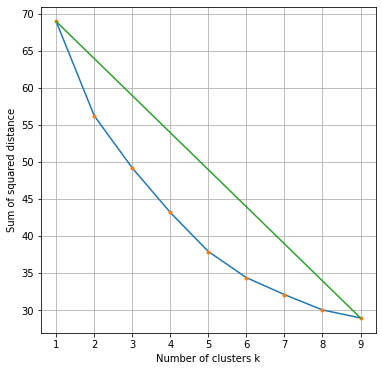

In [7]:
interval = range(x0, x1 + 1)

plt.figure(figsize = (6, 6))
# plt.title('Elbow Method')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.grid()

plt.xticks(interval)

plt.plot(interval, inertia_list) # orange points
plt.plot(interval, inertia_list, '.') # blue line

plt.plot([x1, x0], [y1, y0]) # green line

plt.show()

In [18]:
distances = []
for i in range(len(inertia_list)):
    x = i + x0
    y = inertia_list[i]
    
    numerator = abs((y1 - y0) * x - (x1 - x0) * y + x1 * y0 - y1 * x0)
    denominator = math.sqrt((y1 - y0) ** 2 + (x1 - x0) ** 2)
    
    distances.append(numerator / denominator)
    
better_k = distances.index(max(distances)) + x0
better_k

12